In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

Establim el nom de les columnes, podem llegir més informació del que conté cadascuna al document housing_data_description.txt

In [2]:
columnes=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT', 'MEDV']

In [3]:
df=pd.read_csv("housing_data.csv", names=columnes)

In [4]:
train, test=train_test_split(df,test_size=0.33, random_state=1)

In [5]:
#Fem un dataframe per tal de poder fer un estudi descriptiu més clar
train_df=pd.DataFrame(train,columns=columnes)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 378 to 37
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     339 non-null    float64
 1   ZN       339 non-null    float64
 2   INDUS    339 non-null    float64
 3   CHAS     339 non-null    int64  
 4   NOX      339 non-null    float64
 5   RM       339 non-null    float64
 6   AGE      339 non-null    float64
 7   DIS      339 non-null    float64
 8   RAD      339 non-null    int64  
 9   TAX      339 non-null    float64
 10  PTRATIO  339 non-null    float64
 11  B        339 non-null    float64
 12  LSTAT    339 non-null    float64
 13  MEDV     339 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 39.7 KB


Com podem veure a la info tots els atributs són númerics , la majoria d'ells amb decimals excepte 'CHAS' i 'RAD'

In [25]:
train_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
train_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No tenim cap camp buit que ens pugui portar a calculs estadístics erronis, no hem de fer feina de neteja de NaNs

In [8]:
train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,3.793986,10.963127,11.377493,0.079646,0.556238,6.247490,69.173451,3.799550,9.622419,408.890855,18.418584,356.552537,13.087522,22.289971
std,8.669966,23.058729,6.874160,0.271145,0.117996,0.669953,28.246657,2.114897,8.768838,169.654094,2.176714,92.095470,7.340139,9.093571
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.863000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.085770,0.000000,5.640000,0.000000,0.448000,5.873000,45.750000,2.094450,4.000000,279.000000,17.000000,375.990000,7.415000,16.900000
50%,0.253870,0.000000,9.900000,0.000000,0.538000,6.167000,79.700000,3.262800,5.000000,330.000000,19.000000,391.450000,12.030000,20.600000
75%,3.812340,12.500000,18.100000,0.000000,0.627500,6.582500,94.300000,5.033750,24.000000,666.000000,20.200000,396.060000,17.135000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.398000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


A la descripció del dataframe podem veure la quantitat de registres, així com la mitjana, la desviació estàndart, els percentils i els valors màxim i minim per a cada atribut. Podem observar que són dades molt heterogènies amb mitjanes i desviacions estàndart de escales molt diferents.

In [9]:
train_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
378,23.64820,0.0,18.10,0,0.671,6.380,96.2,1.3861,24,666.0,20.2,396.90,23.69,13.1
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437.0,21.2,392.11,17.19,16.2
82,0.03659,25.0,4.86,0,0.426,6.302,32.2,5.4007,4,281.0,19.0,396.90,6.72,24.8
463,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666.0,20.2,393.82,10.29,20.2
207,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4,277.0,18.6,389.43,18.06,22.5
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
89,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270.0,17.8,396.06,5.70,28.7
469,13.07510,0.0,18.10,0,0.580,5.713,56.7,2.8237,24,666.0,20.2,396.90,14.76,20.1
73,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305.0,19.2,377.17,7.54,23.4
187,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398.0,15.2,393.87,6.68,32.0


Visualitzar les 10 primeres files ens pot servir per pendre contacte amb el dataframe real.

<Axes: >

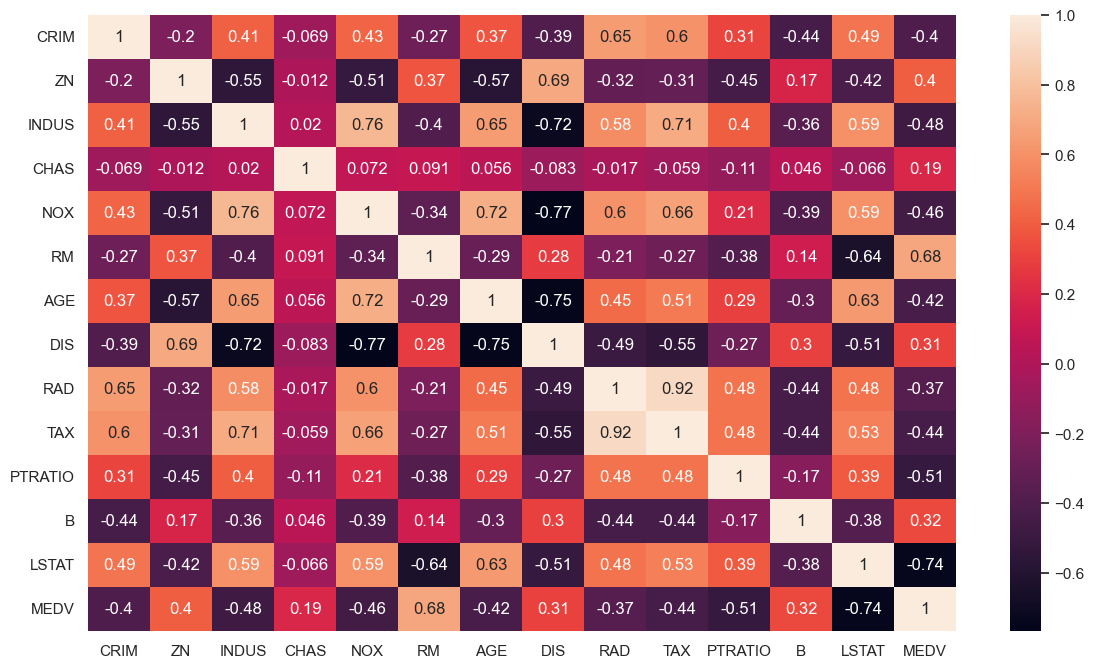

In [52]:
sns.set(rc={'figure.figsize':(14,8)})
sns.heatmap(train_df.corr(), annot=True)

Si prenem com a correlació un valor superior a 0.7, al heatmap de correlacions amb anotacions podem identificar correlació positiva entre les següents columnes:

-'INDUS' amb 'NOX'

-'INDUS' amb 'TAX'

-'NOX' amb 'AGE'

-'RAD' amb 'TAX' (0.92)


Podem observar correlació negativa entre les següents columnes:

-'INDUS' amb 'DIS'

-'NOX' amb 'DIS'

-'AGE' amb 'DIS'

-'LSTAT' amb 'MEDV'



Sembla lògic que les zones amb un nivell de negocis que no son de venda ('INDUS') (assumim pel nom que és refereix a fàbriques) tinguin relació amb el nivell de oxid de nitrògen('NOX'), que segons https://www.apis.ac.uk/overview/pollutants/overview_nox.htm i altres webs consultades s'origina principalment per la combustió de fuel, especialment a la industria i el transport (que està també molt present al voltant de les fàbriques.)

També sembla versemblant que les zones més industrialitzades ('INDUS') estiguin relaciones amb un major nivell d'impostos ('TAX') ja que les empreses solen pagar més quantitat d'impostos que els ciutadans particulars.

També hi ha una correlació entre el nivell d'òxid de nitrogen ('NOX') i la quantitat d'edificis residencials anterior al 1940 ('AGE'). Això pot ser causat a que antigament no és tenien en compte les qüestions ambientals a l'hora de construir un edifici i segons que materials o la calefacció per gasoil poder emetre més òxid de nitrògen.

Destaca per ser més elevada la correlació entre l'accesibilitat a autovies/autopistes ('RAD') i el pagament d'impostos. Donat que és una infraestructura cara de mantenir, sembla lògica aquesta correlació.

En quant a les correlacions negatives hem vist que 'INDUS', 'NOX' i 'AGE' tenen correlació negativa amb 'DIS', té lògica que les zones més industrialitzades i amb més contaminació estiguin a menys distància dels centres de treball. La correlació d''AGE' fa pensar que el nivell de correlació que té amb 'NOX' potser no té a veure amb els materials sino amb la seva ubicació. I si mirem al gràfic veiem que efectivament entre la edat de l'edifici i que estigui a una zona industrial hi ha una correlació de 0.64. I d'aquií que també els edificis més antics estiguin a menys distància dels llocs de treball


Fem una ullada als outliers

<Axes: >

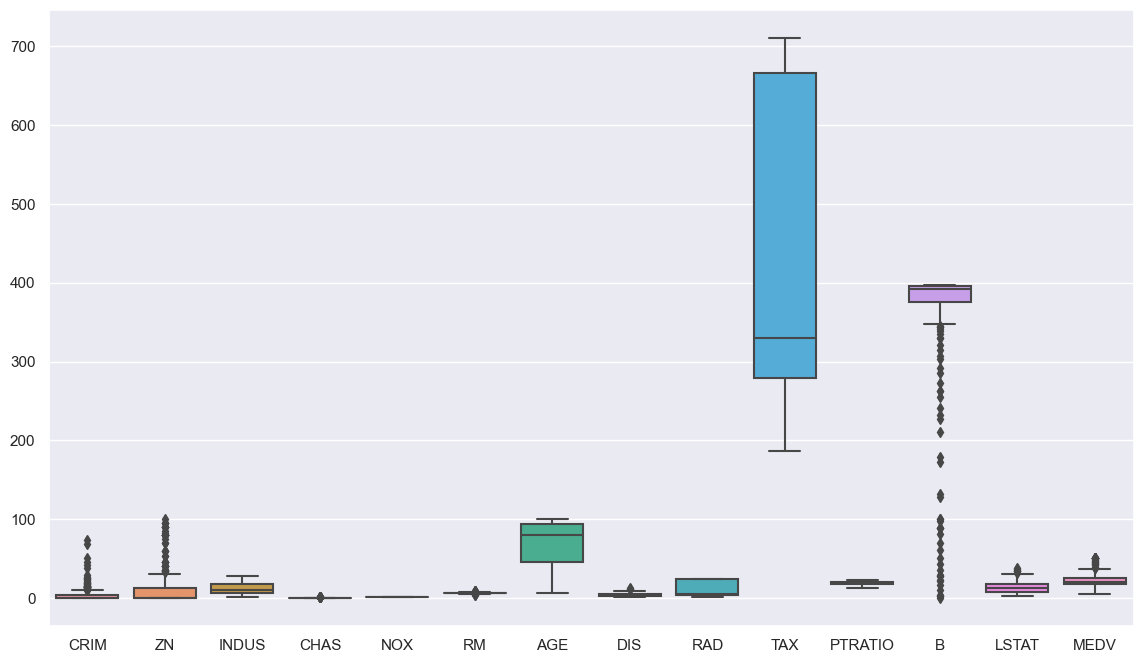

In [53]:
sns.boxplot(train_df)

La diferent d'escala no ens deixa apreciar bé el gràfic, pel moment separarem els atributs segons l'escala:

<Axes: >

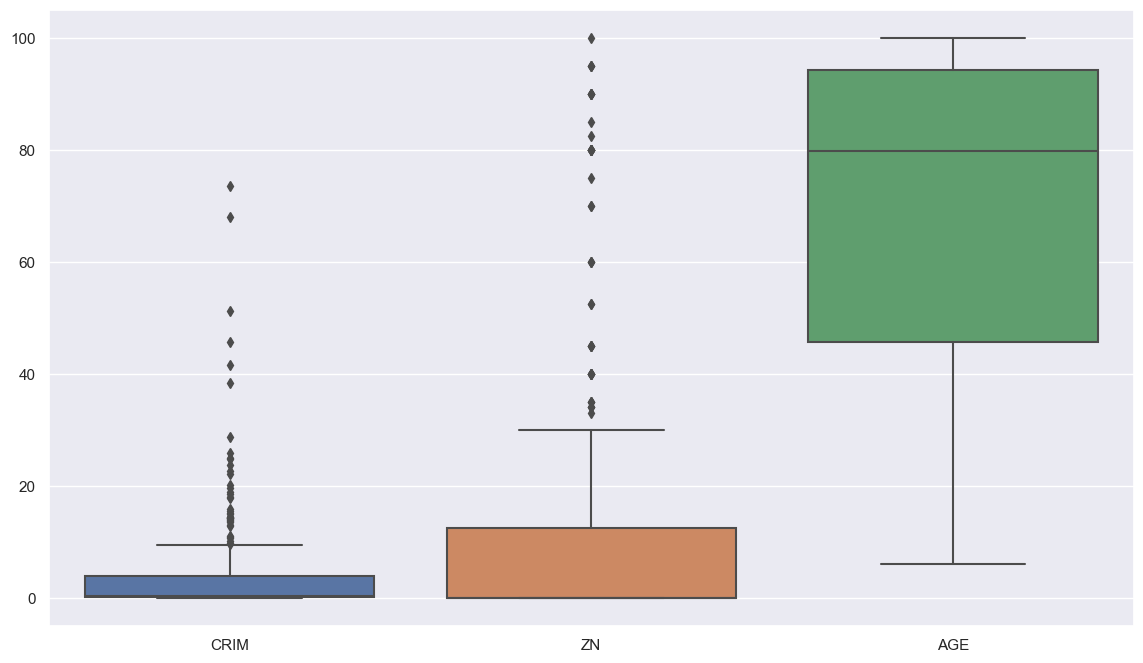

In [54]:
sns.boxplot(train_df.loc[:,['CRIM', 'ZN', 'AGE']])


Podem observar que el ratio de crims ('CRIM') i el percentatge d'us residencial per a terrenys de més de 25000 peus cuadrats (2322 metres cuadrats) ('ZN') tenen molts outliers, que de moment no modificarem, mentre que l'antiguitat dels edificis no en té.

<Axes: >

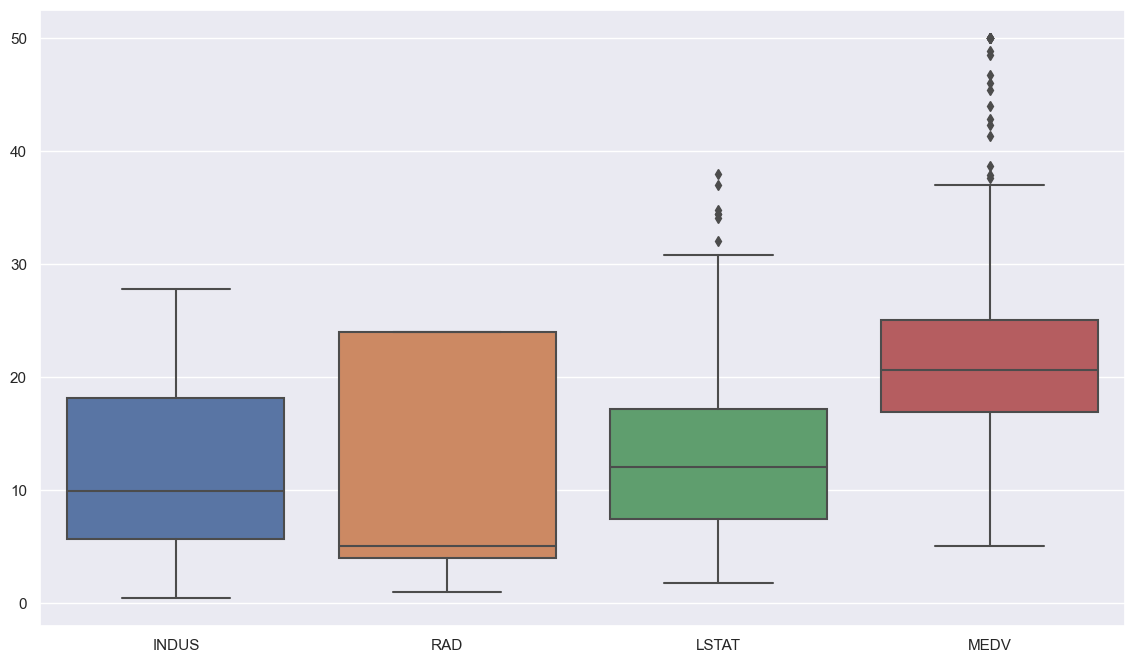

In [55]:
sns.boxplot(train_df.loc[:,['INDUS', 'RAD', 'LSTAT', 'MEDV']])


Aquí podem observar que els atributs INDUS i RAD no tenen outliers, l'atribut 'LSTAT' en té uns quants i 'MEDV' en té bastants.

<Axes: >

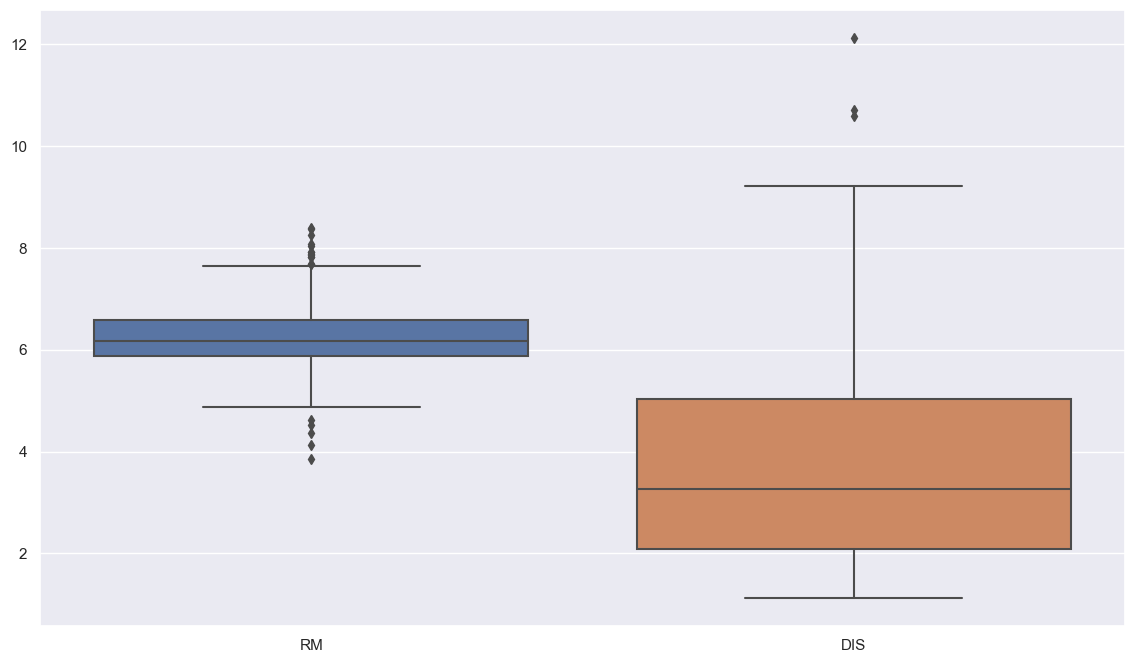

In [56]:
sns.boxplot(train_df.loc[:,['RM', 'DIS']])

Podem veure que l'atribut de mitjana d'habitacions per vivenda ('RM') té molts outliers tant per sota com per damunt. Això podria estar influit per la presencia de molts hotels a una zona. Si els outliers per sota fossin de 0 podria ser per presencia de molts lofts sense habitació, però no es el cas, els outliers per sota no baixen de 3, el qual és un nombre molt raonable d'habitacions per a una vivenda. La mitjana de sis és una mica excesiva, així que podem assumir que edificis amb moltes habitacions que consten com a una sola propietat tipus hotels o b&b l'estan tirant cap amunt.

Els outliers per més distància als llocs de treball ('DIS') poden deures a poblacions més rurals o més remotes.

<Axes: >

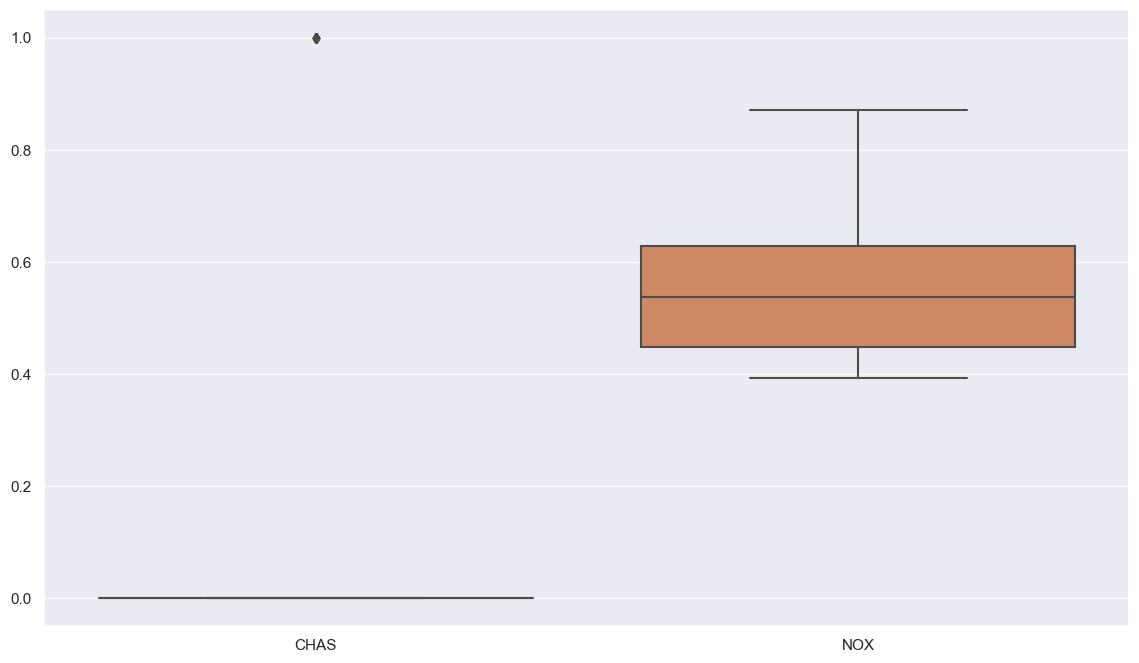

In [57]:
sns.boxplot(train_df.loc[:,['CHAS', 'NOX']])

CHAS es una variable binaria que només accepta valors 0 o 1 en funció de si la zona limita amb el riu, d'aquí la seva representació.

La variable de concentració d'òxid de nitrogen no sembla tenir outliers.

<Axes: >

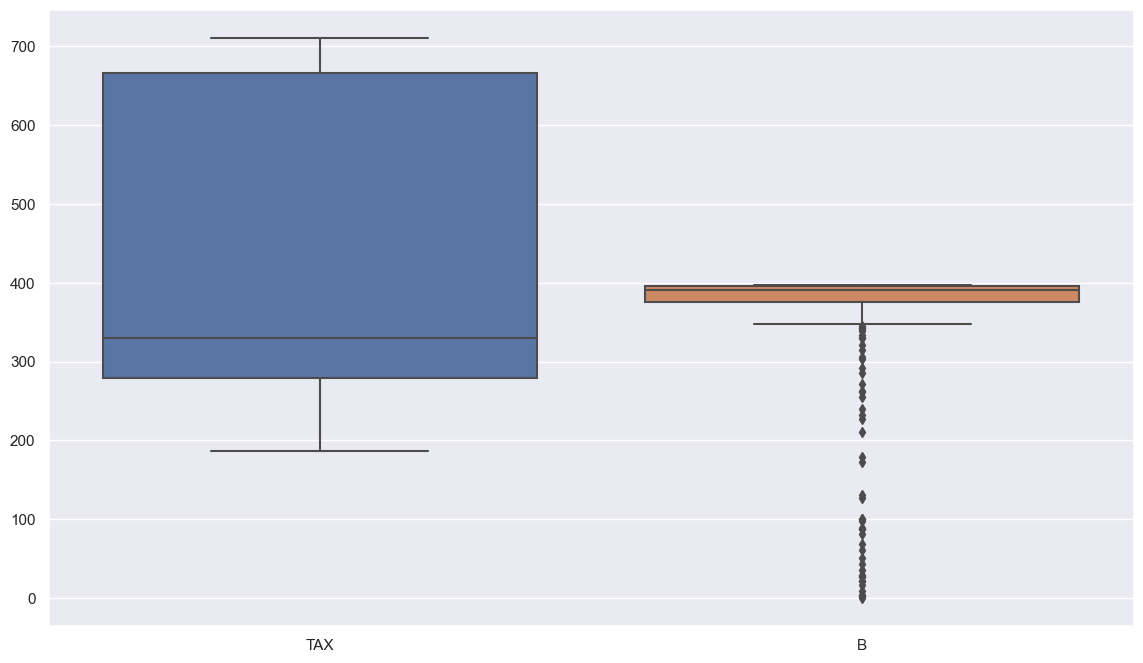

In [58]:
sns.boxplot(train_df.loc[:,['TAX', 'B']])

Mentre la variable del rati d'impostos no tenen outliers, la de la proporció de persones negres per població si que té molts outliers per la part de sota.

Fem una breu anàlisi de les dades de test

In [10]:
#Fem un dataframe per tal de poder fer un estudi descriptiu més clar
test_df=pd.DataFrame(test,columns=columnes)

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 307 to 347
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     167 non-null    float64
 1   ZN       167 non-null    float64
 2   INDUS    167 non-null    float64
 3   CHAS     167 non-null    int64  
 4   NOX      167 non-null    float64
 5   RM       167 non-null    float64
 6   AGE      167 non-null    float64
 7   DIS      167 non-null    float64
 8   RAD      167 non-null    int64  
 9   TAX      167 non-null    float64
 10  PTRATIO  167 non-null    float64
 11  B        167 non-null    float64
 12  LSTAT    167 non-null    float64
 13  MEDV     167 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 19.6 KB


In [12]:
test_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Com era d'esperar els atributs són del mateix tipus i tampoc contenen valors nuls

In [13]:
test_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,3.247195,12.176647,10.648144,0.047904,0.551563,6.360036,67.359880,3.785894,9.401198,406.910180,18.530539,356.920659,11.771138,23.025749
std,8.474939,23.898258,6.826662,0.214206,0.111736,0.761180,27.994376,2.093240,8.605168,166.745525,2.145399,89.921726,6.653123,9.412079
min,0.010960,0.000000,1.250000,0.000000,0.385000,3.561000,2.900000,1.178100,1.000000,188.000000,13.000000,3.650000,1.920000,6.300000
25%,0.076945,0.000000,4.675000,0.000000,0.458000,5.979500,41.700000,2.101800,4.000000,281.000000,17.400000,373.715000,6.605000,17.500000
50%,0.261690,0.000000,8.560000,0.000000,0.532000,6.310000,73.300000,3.092300,5.000000,337.000000,19.100000,390.680000,10.240000,22.100000
75%,3.122525,20.000000,18.100000,0.000000,0.624000,6.630500,93.150000,5.307650,16.000000,666.000000,20.200000,396.660000,15.695000,25.200000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,30.810000,50.000000


Podem veure que la mitjana, la desviació estàndart i els percentils són molt similars en ambdós dataframes, així que podem asumir que s'ha fet una bona divisió on el test es un conjunt de valors més petits però igualment representatiu de les dades.

### Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...)

Primer mostrarem un gràfic KDE amb les dades sense estandaritzar, per veure si ens útil o si necesitem estandarització. Utilitzarem les dades de train.

<function matplotlib.pyplot.show(close=None, block=None)>

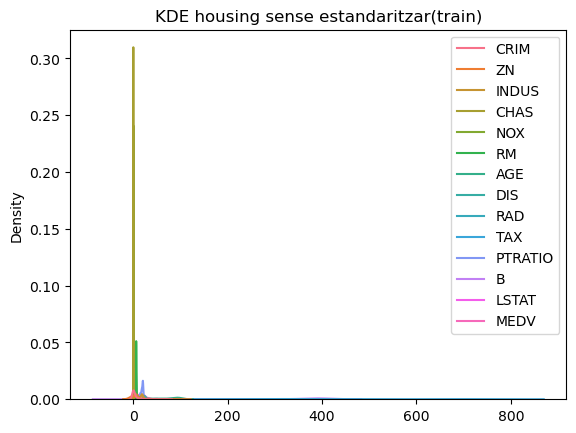

In [14]:
sns.kdeplot(data=train_df).set(title="KDE housing sense estandaritzar(train)")
plt.show

Com poder veure, al no estar les dades estandaritzades, el gràfic no ens aporta valor. Així que les estandaritzarem.

In [15]:
train_estandaritzat=ColumnTransformer([('estandaritzades', StandardScaler(), train_df.columns)]).fit_transform(train_df)


In [16]:
train_estandaritzat

array([[ 2.29338408, -0.47614647,  0.97938436, ...,  0.43875236,
         1.44658711, -1.0120947 ],
       [-0.40831318, -0.47614647,  1.53153947, ...,  0.38666423,
         0.55973629, -0.6706906 ],
       [-0.43402135,  0.60964428, -0.94951631, ...,  0.43875236,
        -0.86877573,  0.27643044],
       ...,
       [ 0.24003964, -0.47614647,  0.97938436, ...,  0.43875236,
         0.85717241, -1.07817291],
       [-0.40007723, -0.47614647, -0.75429524, ...,  0.21963425,
        -0.3011912 ,  0.18832615],
       [-0.42899084, -0.47614647, -0.78926021, ...,  0.43875236,
        -0.58907662, -0.14206491]])

Ho tornem a convertir en dataframe, per poder afegir nom de columnes i presentar la informació de manera més clara

In [17]:
train_estandaritzat_df=pd.DataFrame(train_estandaritzat)
train_estandaritzat_df.columns=columnes

In [18]:
train_estandaritzat_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02
mean,-4.453992e-17,2.619995e-17,9.431983e-17,-1.571997e-17,7.650386e-16,-1.283798e-15,1.192098e-16,-1.964997e-16,1.833997e-17,5.501990e-17,2.095996e-16,8.383985e-17,-2.619995e-18,5.501990e-17
std,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00
min,-4.375179e-01,-4.761465e-01,-1.590541e+00,-2.941742e-01,-1.393945e+00,-3.564450e+00,-2.239799e+00,-1.264315e+00,-9.847559e-01,-1.309835e+00,-2.677055e+00,-3.873797e+00,-1.549604e+00,-1.904151e+00
25%,-4.283405e-01,-4.761465e-01,-8.358802e-01,-2.941742e-01,-9.186526e-01,-5.598052e-01,-8.304727e-01,-8.074249e-01,-6.421296e-01,-7.667534e-01,-6.526722e-01,2.113697e-01,-7.739509e-01,-5.935994e-01
50%,-4.089231e-01,-4.761465e-01,-2.152520e-01,-2.941742e-01,-1.547904e-01,-1.203198e-01,3.732162e-01,-2.541699e-01,-5.279208e-01,-4.656974e-01,2.675020e-01,3.794872e-01,-1.442868e-01,-1.861170e-01
75%,2.120063e-03,6.674891e-02,9.793844e-01,-2.941742e-01,6.048282e-01,5.007896e-01,8.908555e-01,5.844375e-01,1.642046e+00,1.517731e+00,8.196065e-01,4.296179e-01,5.522322e-01,2.984565e-01
max,8.055764e+00,3.867017e+00,2.383811e+00,3.399346e+00,2.671500e+00,3.214686e+00,1.092948e+00,3.943105e+00,1.642046e+00,1.783368e+00,1.647763e+00,4.387524e-01,3.394930e+00,3.051715e+00


Tornem a fer gràfic KDE amb les dades estandaritzades per veure la diferència

<function matplotlib.pyplot.show(close=None, block=None)>

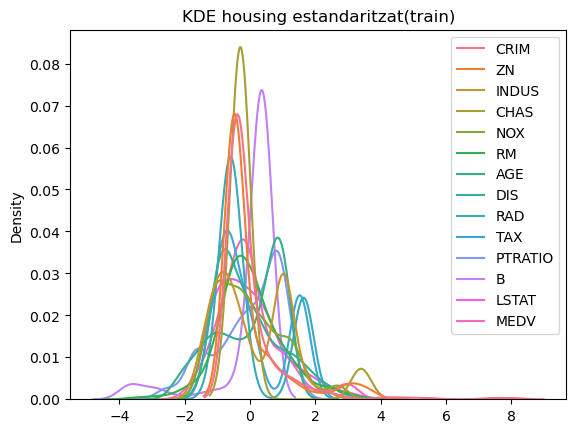

In [19]:
sns.kdeplot(data=train_estandaritzat_df).set(title="KDE housing estandaritzat(train)")
plt.show

Efectivament podem observar que ara sí el gràfic ens ajuda a veure la distribució de cadascun dels atributs. Farem el mateix amb les dades de test

In [20]:
test_estandaritzat=ColumnTransformer([('estandaritzades', StandardScaler(), test_df.columns)]).fit_transform(test_df)

In [21]:
test_estandaritzat_df=pd.DataFrame(test_estandaritzat)
test_estandaritzat_df.columns=columnes

In [22]:
train_estandaritzat_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02
mean,-4.453992e-17,2.619995e-17,9.431983e-17,-1.571997e-17,7.650386e-16,-1.283798e-15,1.192098e-16,-1.964997e-16,1.833997e-17,5.501990e-17,2.095996e-16,8.383985e-17,-2.619995e-18,5.501990e-17
std,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00,1.001478e+00
min,-4.375179e-01,-4.761465e-01,-1.590541e+00,-2.941742e-01,-1.393945e+00,-3.564450e+00,-2.239799e+00,-1.264315e+00,-9.847559e-01,-1.309835e+00,-2.677055e+00,-3.873797e+00,-1.549604e+00,-1.904151e+00
25%,-4.283405e-01,-4.761465e-01,-8.358802e-01,-2.941742e-01,-9.186526e-01,-5.598052e-01,-8.304727e-01,-8.074249e-01,-6.421296e-01,-7.667534e-01,-6.526722e-01,2.113697e-01,-7.739509e-01,-5.935994e-01
50%,-4.089231e-01,-4.761465e-01,-2.152520e-01,-2.941742e-01,-1.547904e-01,-1.203198e-01,3.732162e-01,-2.541699e-01,-5.279208e-01,-4.656974e-01,2.675020e-01,3.794872e-01,-1.442868e-01,-1.861170e-01
75%,2.120063e-03,6.674891e-02,9.793844e-01,-2.941742e-01,6.048282e-01,5.007896e-01,8.908555e-01,5.844375e-01,1.642046e+00,1.517731e+00,8.196065e-01,4.296179e-01,5.522322e-01,2.984565e-01
max,8.055764e+00,3.867017e+00,2.383811e+00,3.399346e+00,2.671500e+00,3.214686e+00,1.092948e+00,3.943105e+00,1.642046e+00,1.783368e+00,1.647763e+00,4.387524e-01,3.394930e+00,3.051715e+00


<function matplotlib.pyplot.show(close=None, block=None)>

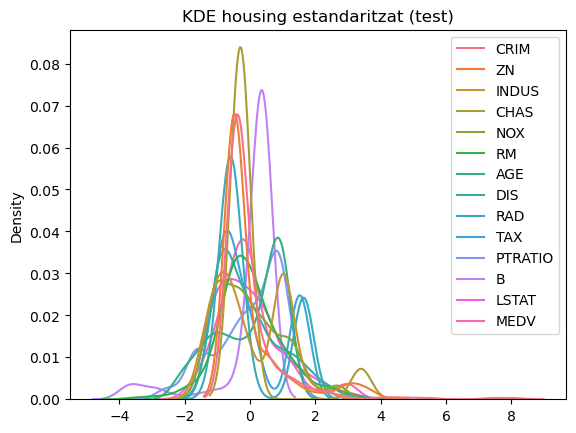

In [23]:
sns.kdeplot(data=train_estandaritzat_df).set(title="KDE housing estandaritzat (test)")
plt.show

In [24]:
train_estandaritzat_df.head(100)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,2.293384,-0.476146,0.979384,-0.294174,0.974028,0.198083,0.958220,-1.142854,1.642046,1.517731,0.819606,0.438752,1.446587,-1.012095
1,-0.408313,-0.476146,1.531539,-0.294174,0.575122,-0.828878,0.951129,-0.952398,-0.642130,0.165930,1.279694,0.386664,0.559736,-0.670691
2,-0.434021,0.609644,-0.949516,-0.294174,-1.105374,0.081485,-1.310885,0.758201,-0.642130,-0.754947,0.267502,0.438752,-0.868776,0.276430
3,0.234160,-0.476146,0.979384,-0.294174,1.330497,0.396898,0.734855,-0.472564,1.642046,1.517731,0.819606,0.405259,-0.381690,-0.230169
4,-0.409140,-0.476146,-0.114728,-0.294174,-0.570671,-0.694342,0.125033,0.262978,-0.642130,-0.778560,0.083467,0.357521,0.678438,0.023131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.558182,-0.476146,0.979384,-0.294174,1.041927,-1.410374,0.706491,-1.019071,1.642046,1.517731,0.819606,-2.492319,1.849081,-1.309447
96,0.049485,-0.476146,0.979384,3.399346,1.814277,-0.664445,0.702945,-0.897278,1.642046,1.517731,0.819606,-0.038197,0.211818,-0.604612
97,-0.387217,-0.476146,-0.754295,-0.294174,-0.443361,0.455197,-1.693796,-0.200992,-0.185294,-0.601468,-0.468637,0.258673,-1.272634,1.014304
98,1.229537,-0.476146,0.979384,-0.294174,0.345964,0.903651,1.092948,-1.105255,1.642046,1.517731,0.819606,-1.926853,0.913112,0.573782


### - Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica